# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each politician:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,abraham,ambedkar,boris,brandt,desmond,gandhi,mandela,margaret,roosevelt,trump,washington,winston
abandoning,0,0,0,0,0,0,0,1,0,0,0,0
abe,1,0,0,0,0,0,0,0,0,0,0,0
abhorred,1,0,0,0,0,0,0,0,0,0,0,0
ability,1,0,0,0,0,0,1,0,0,0,0,0
abitur,0,0,0,1,0,0,0,0,0,0,0,0


#### Find  and print the top 30 words for each politician


In [2]:
# Find the top 30 words in Biography of Politician
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'abraham': [('lincoln', 53),
  ('slavery', 17),
  ('abraham', 11),
  ('war', 10),
  ('union', 9),
  ('people', 8),
  ('president', 8),
  ('lincolns', 7),
  ('republican', 7),
  ('civil', 7),
  ('years', 6),
  ('work', 6),
  ('south', 6),
  ('slaves', 5),
  ('states', 5),
  ('house', 5),
  ('lawyer', 5),
  ('let', 5),
  ('shall', 5),
  ('capacity', 5),
  ('political', 5),
  ('speeches', 4),
  ('southern', 4),
  ('gettysburg', 4),
  ('divided', 4),
  ('new', 4),
  ('address', 4),
  ('opposed', 4),
  ('campaign', 4),
  ('came', 4)],
 'ambedkar': [('ambedkar', 25),
  ('caste', 17),
  ('indian', 15),
  ('india', 13),
  ('untouchables', 10),
  ('constitution', 9),
  ('religion', 8),
  ('political', 7),
  ('society', 7),
  ('hindu', 7),
  ('women', 6),
  ('gandhi', 6),
  ('discrimination', 6),
  ('buddhism', 6),
  ('economics', 6),
  ('electorate', 5),
  ('people', 5),
  ('mahar', 5),
  ('untouchable', 5),
  ('hinduism', 5),
  ('allowed', 5),
  ('rights', 5),
  ('school', 5),
  ('br', 5),
  

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [3]:
from collections import Counter
words = []
for politician in data.columns:
    top = [word for (word, count) in top_dict[politician]]
    for t in top:
        words.append(t)

Counter(words).most_common()
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['people', 'political']

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [4]:
Counter(words).most_common()

[('people', 8),
 ('political', 8),
 ('war', 6),
 ('time', 6),
 ('new', 5),
 ('world', 5),
 ('president', 4),
 ('south', 4),
 ('party', 4),
 ('famous', 4),
 ('great', 4),
 ('campaign', 3),
 ('rights', 3),
 ('conservative', 3),
 ('uk', 3),
 ('life', 3),
 ('policy', 3),
 ('africa', 3),
 ('government', 3),
 ('british', 3),
 ('leader', 3),
 ('tax', 3),
 ('america', 3),
 ('second', 3),
 ('republican', 2),
 ('years', 2),
 ('slaves', 2),
 ('states', 2),
 ('shall', 2),
 ('address', 2),
 ('opposed', 2),
 ('indian', 2),
 ('india', 2),
 ('constitution', 2),
 ('hindu', 2),
 ('women', 2),
 ('gandhi', 2),
 ('london', 2),
 ('minister', 2),
 ('oxford', 2),
 ('prime', 2),
 ('germany', 2),
 ('black', 2),
 ('apartheid', 2),
 ('peace', 2),
 ('africans', 2),
 ('said', 2),
 ('african', 2),
 ('issue', 2),
 ('independence', 2),
 ('muslims', 2),
 ('led', 2),
 ('nation', 2),
 ('later', 2),
 ('end', 2),
 ('economic', 2),
 ('william', 2),
 ('elected', 2),
 ('helped', 2),
 ('churchill', 2),
 ('american', 2),
 ('inc

#### If more than half of the politician have it as a top word, exclude it from the list


In [5]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words.append('t')
add_stop_words

['people', 'political', 't']

In [6]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [7]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

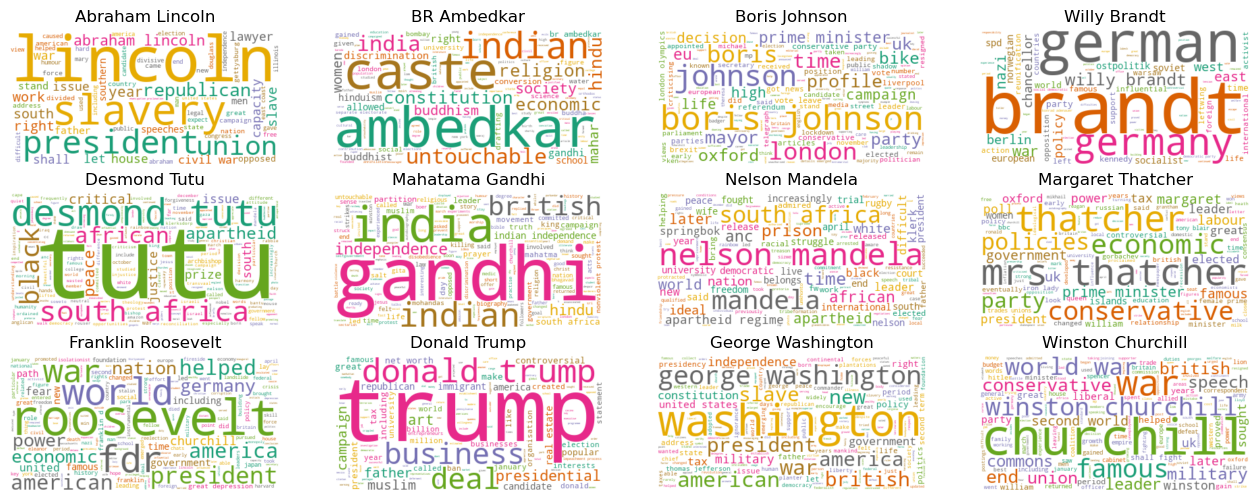

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Abraham Lincoln','BR Ambedkar', 'Boris Johnson','Willy Brandt','Desmond Tutu','Mahatama Gandhi','Nelson Mandela','Margaret Thatcher',
              'Franklin Roosevelt','Donald Trump','George Washington','Winston Churchill']


# Create subplots for each politician
for index, politician in enumerate(data.columns):
    wc.generate(data_clean.transcript[politician])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Your Observations

- 1. The word cloud depicts prominent world leaders and related terms.
- 2. The most prominent name is "Mahatma Gandhi," associated with concepts like "apartheid," "independence," and "civil rights."
- 3. Other notable figures include Abraham Lincoln, Nelson Mandela, Margaret Thatcher, and Winston Churchill.
- 4. Words like "war," "economic," "president," and "prime minister" are frequently used.
- 5. The leaders come from various regions, including India, the United States, South Africa, and the United Kingdom.
- 6. The image seems to focus on leaders who fought for independence, civil rights, or equality.
- 7. It also highlights leaders associated with significant historical events like the American Civil War and World War II.
- 8. The word cloud suggests a connection between leadership and concepts like "democracy," "freedom," and "justice."
- 9. It is unclear which specific message or viewpoint the word cloud is trying to convey.
- 10. The selection of leaders and terms might reflect the creator's perspective or area of interest.

### Action Items:

- Investigate and address the consistent presence of the word "T" in word clouds.
- Filter out profanity words for a more audience-friendly presentation.
- Re-examine the data scraping process for Bo Burnham and Hasan Minhaj to ensure accurate and representative word clouds.



### Assignment 2:
#### Find the number of unique words for each politician uses.

In [9]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
import numpy as np
unique_list = []
unique_list = [np.count_nonzero(data[politician].to_numpy()) for politician in data.columns]

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['politician', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort



,politician,unique_words
8,Franklin Roosevelt,450
4,Desmond Tutu,476
7,Margaret Thatcher,478
10,George Washington,491
6,Nelson Mandela,497
5,Mahatama Gandhi,502
9,Donald Trump,522
11,Winston Churchill,595
1,BR Ambedkar,597
0,Abraham Lincoln,616


In [10]:
import plotly.express as px

# Assuming 'data_unique_sort' is the DataFrame containing unique word counts
fig = px.bar(data_unique_sort, x='politician', y='unique_words', title='Unique Words Count for Each politician', labels={'politician': 'politician', 'unique_words': 'Unique Words Count'})

# Add hover data for better interactivity
fig.update_traces(hovertemplate='politician: %{x}<br>Unique Words Count: %{y}')

# Set layout parameters for better appearance
fig.update_layout(xaxis_title='politician', yaxis_title='Unique Words Count', xaxis_tickangle=-45, showlegend=False)

# Show the plot
fig.show()


In [11]:
# Calculate the words per minute of each politician
# Find the total number of words used in politician biography
total_list = []
for politician in data.columns:
    totals = sum(data[politician])
    total_list.append(totals)
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_wpm_sort = data_words.sort_values(by='words_per_minute')
# Rename the 'comedian' column to 'politician'
data_wpm_sort.rename(columns={'comedian': 'politician'}, inplace=True)

# Display the DataFrame with the updated column name
data_wpm_sort


,politician,unique_words,total_words,run_times,words_per_minute
10,George Washington,491,698,76,9.184211
4,Desmond Tutu,476,711,67,10.611940
6,Nelson Mandela,497,825,77,10.714286
8,Franklin Roosevelt,450,673,62,10.854839
5,Mahatama Gandhi,502,800,73,10.958904
11,Winston Churchill,595,922,79,11.670886
7,Margaret Thatcher,478,739,63,11.730159
9,Donald Trump,522,765,58,13.189655
2,Boris Johnson,648,1065,80,13.312500
1,BR Ambedkar,597,938,59,15.898305


In [12]:
# Print column names to verify if renaming was successful
print(data_unique_sort.columns)
print(data_wpm_sort.columns)


Index(['politician', 'unique_words'], dtype='object')
Index(['politician', 'unique_words', 'total_words', 'run_times',
       'words_per_minute'],
      dtype='object')


In [13]:
# Create a merged DataFrame based on the 'name' column
merged_data = pd.merge(data_unique_sort, data_wpm_sort, on='politician')

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(merged_data, x='politician', y='unique_words_y', z='words_per_minute', color='politician')

# Set plot labels and title
fig.update_layout(title='3D Scatter Plot of Unique Words, Words Per Minute, and Politician',
                  scene=dict(xaxis_title='Politician', yaxis_title='Unique Words Count', zaxis_title='Words Per Minute'))

# Show the plot
fig.show()


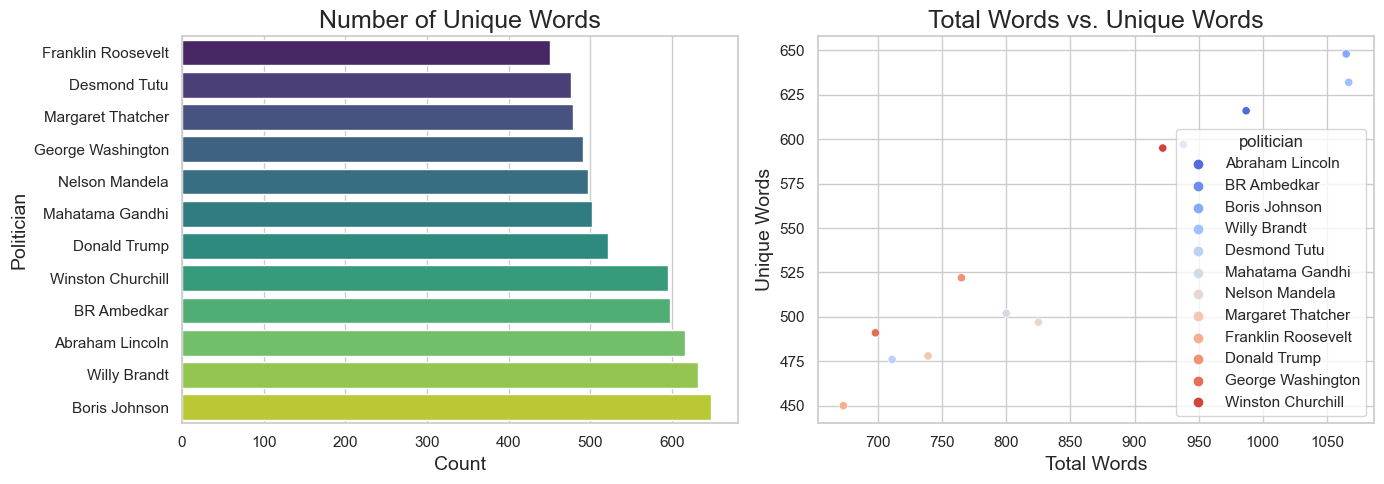

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a 1x2 grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot 1: Number of Unique Words
sns.barplot(x=data_unique_sort['unique_words'], y=data_unique_sort['politician'], ax=axes[0], palette='viridis')
axes[0].set_title('Number of Unique Words', fontsize=18)
axes[0].set_xlabel('Count', fontsize=14)
axes[0].set_ylabel('Politician', fontsize=14)

# Plot 4: Total Words vs. Unique Words
sns.scatterplot(x=data_words['total_words'], y=data_words['unique_words'], hue=data_words['politician'], palette='coolwarm', ax=axes[1])
axes[1].set_title('Total Words vs. Unique Words', fontsize=18)
axes[1].set_xlabel('Total Words', fontsize=14)
axes[1].set_ylabel('Unique Words', fontsize=14)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


#### Write your findings. For example:
* **Most Unique Word-** *Boris Johnson* Biography contains most Unique Words
* **Least Unique Word-** *Franklin Rossevelt* Biography contains least Unique Words
   


### Assignment 3: 
#### Check the common word in Biography of all Politician

In [15]:
# take a look at the most common words.
Counter(words).most_common()

[('people', 8),
 ('political', 8),
 ('war', 6),
 ('time', 6),
 ('new', 5),
 ('world', 5),
 ('president', 4),
 ('south', 4),
 ('party', 4),
 ('famous', 4),
 ('great', 4),
 ('campaign', 3),
 ('rights', 3),
 ('conservative', 3),
 ('uk', 3),
 ('life', 3),
 ('policy', 3),
 ('africa', 3),
 ('government', 3),
 ('british', 3),
 ('leader', 3),
 ('tax', 3),
 ('america', 3),
 ('second', 3),
 ('republican', 2),
 ('years', 2),
 ('slaves', 2),
 ('states', 2),
 ('shall', 2),
 ('address', 2),
 ('opposed', 2),
 ('indian', 2),
 ('india', 2),
 ('constitution', 2),
 ('hindu', 2),
 ('women', 2),
 ('gandhi', 2),
 ('london', 2),
 ('minister', 2),
 ('oxford', 2),
 ('prime', 2),
 ('germany', 2),
 ('black', 2),
 ('apartheid', 2),
 ('peace', 2),
 ('africans', 2),
 ('said', 2),
 ('african', 2),
 ('issue', 2),
 ('independence', 2),
 ('muslims', 2),
 ('led', 2),
 ('nation', 2),
 ('later', 2),
 ('end', 2),
 ('economic', 2),
 ('william', 2),
 ('elected', 2),
 ('helped', 2),
 ('churchill', 2),
 ('american', 2),
 ('inc

In [16]:
# Replace 'elections', 'government', 'society with other words related to politician biography
data_bad_words = data.transpose()[['elections', 'government', 'society']]
data_profanity = pd.concat([data_bad_words.elections + data_bad_words.government, data_bad_words.society], axis=1)
data_profanity.columns = ['Related_Word_1', 'Related_Word_2']
data_profanity


,Related_Word_1,Related_Word_2
abraham,2,1
ambedkar,4,7
boris,2,1
brandt,3,2
desmond,3,0
gandhi,3,2
mandela,2,1
margaret,5,2
roosevelt,3,0
trump,1,0


c:\Users\pulki\anaconda3\Lib\site-packages\matplotlib\collections.py:1109: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



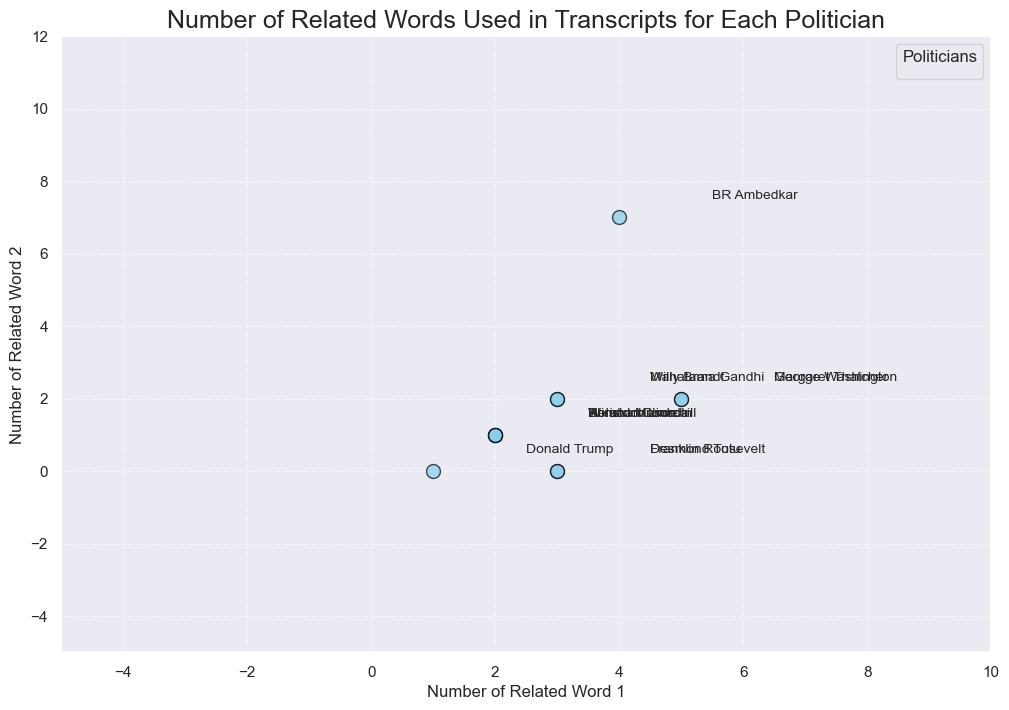

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using seaborn
sns.set(style="darkgrid")

# Create a scatter plot with improved appearance
plt.figure(figsize=(12, 8))

# Scatter plot with better markers, colors, and labels
scatter = plt.scatter(data_profanity['Related_Word_1'], data_profanity['Related_Word_2'], c='skyblue', edgecolors='black', alpha=0.7, s=100)

# Annotate each point with politician names
for i, politician in enumerate(data_profanity.index):
    plt.text(data_profanity['Related_Word_1'].loc[politician] + 1.5, data_profanity['Related_Word_2'].loc[politician] + 0.5, full_names[i], fontsize=10)

# Set plot labels and title
plt.title('Number of Related Words Used in Transcripts for Each Politician', fontsize=18)
plt.xlabel('Number of Related Word 1', fontsize=12)
plt.ylabel('Number of Related Word 2', fontsize=12)

# Add a legend
plt.legend(*scatter.legend_elements(), title="Politicians")

# Improve axis limits for better visibility
plt.xlim(-5, max(data_profanity['Related_Word_1']) + 5)
plt.ylim(-5, max(data_profanity['Related_Word_2']) + 5)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


### Write your findings. 
* **Winston Churchill Biography Uses the Most Amount Of word Election, Government Society** 
* **Desmond Tutu Biography has use Society word more** 

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [18]:
print(data.columns)


Index(['abraham', 'ambedkar', 'boris', 'brandt', 'desmond', 'gandhi',
       'mandela', 'margaret', 'roosevelt', 'trump', 'washington', 'winston'],
      dtype='object')


In [19]:
data.head()

,abraham,ambedkar,boris,brandt,desmond,gandhi,mandela,margaret,roosevelt,trump,washington,winston
abandoning,0,0,0,0,0,0,0,1,0,0,0,0
abe,1,0,0,0,0,0,0,0,0,0,0,0
abhorred,1,0,0,0,0,0,0,0,0,0,0,0
ability,1,0,0,0,0,0,1,0,0,0,0,0
abitur,0,0,0,1,0,0,0,0,0,0,0,0


In [20]:
import pandas as pd

# Assuming 'data' is your original DataFrame

# Transpose the DataFrame and select only the columns 'war', 'political', and 'people'
data_bad_words = data.transpose()[['war', 'political', 'people']]

# Create a DataFrame with separate columns for 'war', 'political', and 'people' with alternative names
data_profanity = pd.DataFrame({
    'War Related': data_bad_words['war'],
    'Political Related': data_bad_words['political'],
    'People Related': data_bad_words['people']
})

data_profanity


,War Related,Political Related,People Related
abraham,10,5,8
ambedkar,0,7,5
boris,0,5,6
brandt,11,7,3
desmond,4,0,10
gandhi,3,2,3
mandela,1,4,8
margaret,1,4,4
roosevelt,10,3,6
trump,0,3,2


In [21]:
print(data_profanity['War Related'].head())
print(data_profanity['Political Related'].head())


abraham     10
ambedkar     0
boris        0
brandt      11
desmond      4
Name: War Related, dtype: int64
abraham     5
ambedkar    7
boris       5
brandt      7
desmond     0
Name: Political Related, dtype: int64


c:\Users\pulki\anaconda3\Lib\site-packages\matplotlib\collections.py:1109: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



<Figure size 1200x800 with 0 Axes>

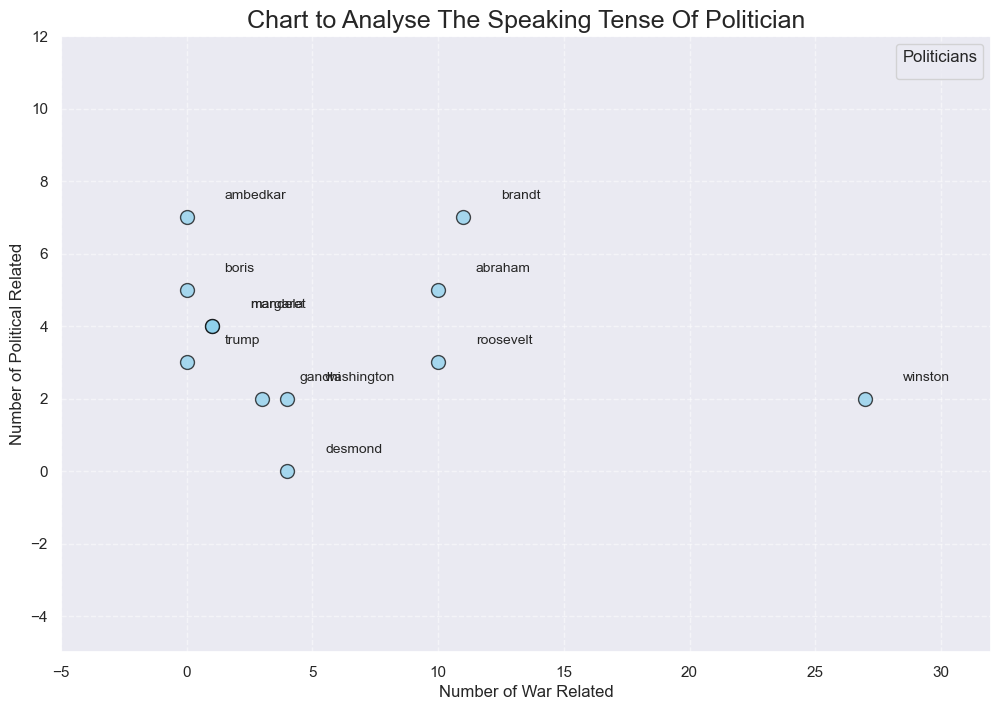

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using seaborn
sns.set(style="darkgrid")

# Create a scatter plot with improved appearance
plt.figure(figsize=(12, 8))

# Convert columns to numeric
data_profanity['War Related'] = pd.to_numeric(data_profanity['War Related'])
data_profanity['Political Related'] = pd.to_numeric(data_profanity['Political Related'])

# Plot the scatter plot again
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_profanity['War Related'], data_profanity['Political Related'], c='skyblue', edgecolors='black', alpha=0.7, s=100)
for i, politician in enumerate(data_profanity.index):
    plt.text(data_profanity['War Related'].loc[politician] + 1.5, data_profanity['Political Related'].loc[politician] + 0.5, politician, fontsize=10)
plt.title('Chart to Analyse The Speaking Tense Of Politician', fontsize=18)
plt.xlabel('Number of War Related', fontsize=12)
plt.ylabel('Number of Political Related', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Politicians")
plt.xlim(-5, max(data_profanity['War Related']) + 5)
plt.ylim(-5, max(data_profanity['Political Related']) + 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


